<a href="https://colab.research.google.com/github/jeffyelson/IntroductiontoDeepLearning/blob/main/IDLAssignment_01_MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing TensorFlow, Numpy , Matplotlib and datasets.py


In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

###Loading the MNIST Dataset

In [26]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

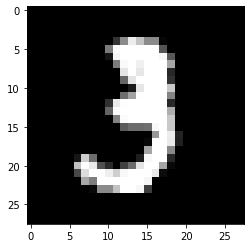

In [27]:
plt.imshow(train_images[10], cmap="Greys_r")

In [28]:
train_images[10].shape

(28, 28)

###Reshaping the 28*28 image pixels to a column

In [29]:
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [30]:
#Shape and Size of Entire Dataset
data.train_data.shape

(60000, 784)

In [31]:
#Reshaped Training Data
data.train_data[0].shape

(784,)

###Initialization of weights and biases

If we initialize all the weights to zero then during backpropagation the gradient calculated will be same for all the hidden layers. Therefore this will lead to a deterministic output and all the hidden layer units will be symmetric. We need to therefore do a symmetry breaking initialization. We can randomly initialize values. Two standard distributions to initialize the network parameters are the Gaussian or uniform distributions.

Random Normal Distribution in TensorFlow
tf.random.normal(
    shape,
    mean=0.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)


*   The initialization has usually zero mean and standard deviation one.

*   The biases are usually set to zeros or ones.

######Initialization-Normal + ActivationFunction=ReLu

In [32]:
W1 = tf.Variable(tf.random.normal(shape = [784, 128],
    mean=0.0, stddev=0.05, seed=None))
b1 = tf.Variable(np.zeros(128, dtype=np.float32))

W2 = tf.Variable(tf.random.normal(shape = [128, 10],
    mean=0.0, stddev=0.05, seed=None))
b2 = tf.Variable(np.zeros(10, dtype=np.float32))


def model1(inputs):
  #Computing the hidden layers - We choose relu activation function
  h1 = tf.nn.relu(tf.matmul(inputs,W1)+b1)
  h2 = tf.nn.relu(tf.matmul(h1,W2)+b2)

  #I tried sigmoid activation function but it has around 83 - 85 percent accuracy. ReLu performs better.




  return h2



In [33]:
train_steps = 2000
learning_rate = 0.1

In [34]:
# training loop

for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()

    with tf.GradientTape(persistent=True) as tape:
        logits = model1(image_batch)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=label_batch))
  
    grads = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])

    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

    
    # every so often we print loss/accuracy
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, xent, acc))
    
del tape

Step 1. Batch loss: 2.3046133518218994 Batch accuracy: 0.109375
Step 101. Batch loss: 0.5693728923797607 Batch accuracy: 0.8671875
Step 201. Batch loss: 0.45631730556488037 Batch accuracy: 0.8671875
Step 301. Batch loss: 0.38184309005737305 Batch accuracy: 0.9140625
Step 401. Batch loss: 0.3502623438835144 Batch accuracy: 0.8984375
Starting new epoch...
Step 501. Batch loss: 0.3632490336894989 Batch accuracy: 0.9140625
Step 601. Batch loss: 0.17942240834236145 Batch accuracy: 0.953125
Step 701. Batch loss: 0.27478712797164917 Batch accuracy: 0.90625
Step 801. Batch loss: 0.3601808249950409 Batch accuracy: 0.875
Step 901. Batch loss: 0.30228471755981445 Batch accuracy: 0.890625
Starting new epoch...
Step 1001. Batch loss: 0.15435072779655457 Batch accuracy: 0.96875
Step 1101. Batch loss: 0.19857802987098694 Batch accuracy: 0.953125
Step 1201. Batch loss: 0.130287766456604 Batch accuracy: 0.9609375
Step 1301. Batch loss: 0.25763261318206787 Batch accuracy: 0.9140625
Step 1401. Batch loss

In [35]:
test_preds = tf.argmax(model1(data.test_data), axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Test accuracy: {}".format(acc))


Test accuracy: 0.9477999806404114


#####Initialization=Uniform + Activation=Sigmoid

In [36]:
W3 = tf.Variable(tf.random.uniform(shape = [784, 128],
    minval=-0.1, maxval=0.1, seed=None))
b3 = tf.Variable(np.zeros(128, dtype=np.float32))

W4 = tf.Variable(tf.random.uniform(shape = [128, 10],
    minval=-0.1, maxval=0.1, seed=None))
b4 = tf.Variable(np.zeros(10, dtype=np.float32))


def model2(inputs):
  #Computing the hidden layers - We choose relu activation function
  h3 = tf.nn.sigmoid(tf.matmul(inputs,W3)+b3)
  h4 = tf.nn.sigmoid(tf.matmul(h3,W4)+b4)



  return h4



In [39]:
# training loop

for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()

    with tf.GradientTape(persistent=True) as tape2:
        logits2 = model2(image_batch)
        xent2 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits2, labels=label_batch))
  
    grads3 = tape2.gradient(xent2, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

    grads4 = tape2.gradient(xent2, [W4, b4])
    W4.assign_sub(learning_rate * grads4[0])
    b4.assign_sub(learning_rate * grads4[1])

    
    # every so often we print loss/accuracy
    if not step % 100:
        preds = tf.argmax(logits2, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, xent2, acc))
    
del tape2

Step 1. Batch loss: 1.7207486629486084 Batch accuracy: 0.8671875
Step 101. Batch loss: 1.718675971031189 Batch accuracy: 0.859375
Step 201. Batch loss: 1.7365882396697998 Batch accuracy: 0.796875
Starting new epoch...
Step 301. Batch loss: 1.6872715950012207 Batch accuracy: 0.8671875
Step 401. Batch loss: 1.695929765701294 Batch accuracy: 0.859375
Step 501. Batch loss: 1.7340885400772095 Batch accuracy: 0.828125
Step 601. Batch loss: 1.6672061681747437 Batch accuracy: 0.890625
Starting new epoch...
Step 701. Batch loss: 1.7002074718475342 Batch accuracy: 0.8515625
Step 801. Batch loss: 1.6881155967712402 Batch accuracy: 0.875
Step 901. Batch loss: 1.7110002040863037 Batch accuracy: 0.8828125
Step 1001. Batch loss: 1.6974231004714966 Batch accuracy: 0.7890625
Step 1101. Batch loss: 1.6838717460632324 Batch accuracy: 0.8359375
Starting new epoch...
Step 1201. Batch loss: 1.6746387481689453 Batch accuracy: 0.859375
Step 1301. Batch loss: 1.7153035402297974 Batch accuracy: 0.8125
Step 1401

In [40]:
test_preds2 = tf.argmax(model2(data.test_data), axis=1,
                       output_type=tf.int32)
acc2 = tf.reduce_mean(tf.cast(tf.equal(test_preds2, data.test_labels),
                             tf.float32))
print("Test accuracy: {}".format(acc2))


Test accuracy: 0.8744999766349792
